### Deliverable 1: Preprocessing the Data for a Neural Network

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [15]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df.APPLICATION_TYPE.value_counts()
application_type

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

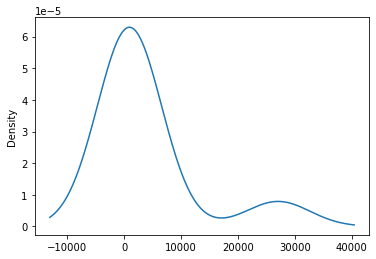

In [16]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [17]:
# Determine which values to replace if counts are less than ...?
replace_applications = list(application_type[application_type < 500].index)

# Replace in dataframe
for app in replace_applications:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [18]:
# Look at CLASSIFICATION value counts for binning
classification_type = application_df.CLASSIFICATION.value_counts()
classification_type

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1248        1
C1900        1
C8210        1
C6100        1
C1728        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

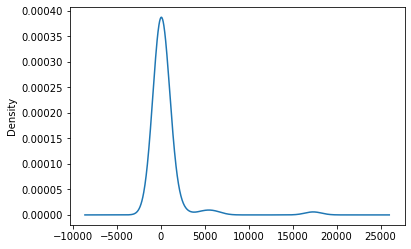

In [19]:
# Visualize the value counts of CLASSIFICATION
classification_type.plot.density()

In [20]:
# Determine which values to replace if counts are less than ..?
replace_classifications = list(classification_type[classification_type < 1000].index)

# Replace in dataframe
for cls in replace_classifications:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [22]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [23]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Split our preprocessed data into our features and target arrays
y = application_df["STATUS"].values
X = application_df.drop(["STATUS"], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 5:03 - loss: 3.6790e-05 - accuracy: 1.0000
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 26/804 [..............................] - ETA: 1s - loss: 1.9523e-04 - accuracy: 1.0000  
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
 51/804 [>.............................] - ETA: 1s - loss: 1.4901e-04 - accuracy: 1.0000
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving mod

536/804 [===================>..........] - ETA: 0s - loss: 5.6503e-04 - accuracy: 0.9999
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 5.6575e-04 - accuracy: 0.9999
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 5.6556e-04 - accuracy: 0.9999
Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoints/weights.01.hdf5

Epoch 00001: saving model to checkpoint


Epoch 00002: saving model to checkpoints/weights.02.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 5.8469e-06 - accuracy: 1.0000
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 4.1351e-05 - accuracy: 1.0000
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoints/weights.02.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 8.7268e-05 - accuracy: 1.0000
Epoch 00002: saving model to checkpoints/weights.02.hdf5

Epoch 00002: saving model to checkpoint

Epoch 3/100
  1/804 [..............................] - ETA: 0s - loss: 3.7570e-05 - accuracy: 1.0000
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 23/804 [..............................] - ETA: 1s - loss: 2.5205e-05 - accuracy: 1.0000
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
 48/804 [>.............................] - ETA: 1s - loss: 3.2839e-05 - accuracy: 1.0000
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model t


Epoch 00003: saving model to checkpoints/weights.03.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 2.2003e-04 - accuracy: 1.0000
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 2.3350e-04 - accuracy: 1.0000
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoints/weights.03.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 2.4881e-04 - accuracy: 1.0000
Epoch 00003: saving model to checkpoints/weights.03.hdf5

Epoch 00003: saving model to checkpoint

264/804 [========>.....................] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 9.8003e-04 - accuracy: 0.9998
Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weights.04.hdf5

Epoch 00004: saving model to checkpoints/weight

804/804 [==============================] - 2s 2ms/step - loss: 8.1802e-04 - accuracy: 0.9999
Epoch 5/100
  1/804 [..............................] - ETA: 0s - loss: 2.8946e-04 - accuracy: 1.0000
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 25/804 [..............................] - ETA: 1s - loss: 6.1154e-04 - accuracy: 1.0000
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
 50/804 [>.............................] - ETA: 1s - loss: 5.1458e-04 - accuracy: 1.0000
Epoch 00005: saving model to checkpoints/weights.0


Epoch 00005: saving model to checkpoints/weights.05.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996
Epoch 00005: saving model to checkpoints/weights.05.hdf5

Epoch 00005: saving model to checkpoints/weights.05

261/804 [========>.....................] - ETA: 1s - loss: 7.7356e-04 - accuracy: 0.9999
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 7.6533e-04 - accuracy: 0.9999
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5
306/804 [==========>...................] - ETA: 1s - loss: 7.5498e-04 - accuracy: 0.9999
Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoints/weights.06.hdf5

Epoch 00006: saving model to checkpoint

804/804 [==============================] - 2s 2ms/step - loss: 6.9279e-04 - accuracy: 0.9999
Epoch 7/100
  1/804 [..............................] - ETA: 0s - loss: 1.0088e-07 - accuracy: 1.0000
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 22/804 [..............................] - ETA: 2s - loss: 2.4939e-04 - accuracy: 1.0000
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
 47/804 [>.............................] - ETA: 1s - loss: 1.7438e-04 - accuracy: 1.0000
Epoch 00007: saving model to checkpoints/weights.0

527/804 [==================>...........] - ETA: 0s - loss: 4.9479e-04 - accuracy: 0.9999
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 5.1639e-04 - accuracy: 0.9999
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 5.3457e-04 - accuracy: 0.9999
Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoints/weights.07.hdf5

Epoch 00007: saving model to checkpoint


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 1.7757e-04 - accuracy: 1.0000
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 2.5622e-04 - accuracy: 1.0000
Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 3.1803e-04 


Epoch 00008: saving model to checkpoints/weights.08.hdf5

Epoch 00008: saving model to checkpoints/weights.08.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 5.8838e-04 - accuracy: 0.9999
Epoch 9/100
  1/804 [..............................] - ETA: 0s - loss: 9.5469e-19 - accuracy: 1.0000
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 24/804 [..............................] - ETA: 1s - loss: 2.8803e-05 - accuracy: 1.0000
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
 49/804 [>.............


Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 2.9230e-04 - accuracy: 0.9999
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 3.1098e-04 - accuracy: 0.9999
Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5

Epoch 00009: saving model to checkpoints/weights.09.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 3.2717e-04 


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 3.5447e-04 - accuracy: 1.0000
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 3.3888e-04 - accuracy: 1.0000
Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
325/804 [===


Epoch 00010: saving model to checkpoints/weights.10.hdf5

Epoch 00010: saving model to checkpoints/weights.10.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 5.7303e-04 - accuracy: 0.9999
Epoch 11/100
  1/804 [..............................] - ETA: 0s - loss: 8.1009e-17 - accuracy: 1.0000
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 26/804 [..............................] - ETA: 1s - loss: 7.2402e-05 - accuracy: 1.0000
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
 51/804 [>............


Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 4.0292e-04 - accuracy: 0.9999
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 4.1217e-04 - accuracy: 0.9999
Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5

Epoch 00011: saving model to checkpoints/weights.11.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 4.1959e-04 


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 0.0015 - accuracy: 0.9995
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.0014 - accuracy: 0.9996
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.0013 - accuracy: 


Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
787/804 [============================>.] - ETA: 0s - loss: 9.5007e-04 - accuracy: 0.9997
Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5

Epoch 00012: saving model to checkpoints/weights.12.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 9.4894e-04 - accuracy: 0.9997
Epoch 13/100
  1/804 [..............................] - ETA: 0s - loss: 1.0262e-05 - accuracy: 1.0000
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
 23/804 [..............................] - ETA: 1s - loss: 0.0015 - accuracy: 0.


Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5

Epoch 00013: saving model to checkpoints/weights.13.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00013: saving model to checkpoints/weights.13


Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
249/804 [========>.....................] - ETA: 1s - loss: 8.9715e-04 - accuracy: 0.9998
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 9.1066e-04 - accuracy: 0.9998
Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 9.1496e-04 - accuracy: 0.9998
Epoch 00014: saving model to checkpoint


Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5

Epoch 00014: saving model to checkpoints/weights.14.hdf5
799/804 [============================>.] - ETA: 0s - loss: 9.4361e-04 - accuracy: 0.9998
Epoch 00014: saving model to checkpoints/weights.14.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 9.4332e-04 - accuracy: 0.9998
Epoch 15/100
  1/804 [..............................] - ETA: 0s - loss: 3.0701e-04 - accuracy: 1.0000
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
 25/804 [..............................] - ETA: 1s - loss: 2.7502e-04 - accuracy: 1.0000
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.


Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 7.3540e-04 - accuracy: 0.9998
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 7.2994e-04 - accuracy: 0.9998
Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5

Epoch 00015: saving model to checkpoints/weights.15.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 7.2768e-04 - accuracy: 0.9998
Epoch 00015: saving model to checkpoint

241/804 [=======>......................] - ETA: 1s - loss: 2.3019e-04 - accuracy: 1.0000
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
266/804 [========>.....................] - ETA: 1s - loss: 2.8190e-04 - accuracy: 1.0000
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 3.2643e-04 - accuracy: 0.9999
Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoint


Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5

Epoch 00016: saving model to checkpoints/weights.16.hdf5
796/804 [============================>.] - ETA: 0s - loss: 6.6839e-04 - accuracy: 0.9999
Epoch 00016: saving model to checkpoints/weights.16.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 6.7006e-04 - accuracy: 0.9999
Epoch 17/100
  1/804 [..............................] - ETA: 0s - loss: 7.8596e-09 - accuracy: 1.0000
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
 23/804 [..............................] - ETA: 1s - loss: 4.2882e-04 - accuracy: 1.0000
Epoch 00017: saving model to checkpoints/weights.


Epoch 00017: saving model to checkpoints/weights.17.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17.hdf5

Epoch 00017: saving model to checkpoints/weights.17


Epoch 00018: saving model to checkpoints/weights.18.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 2.7314e-05 - accuracy: 1.0000
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 2.7486e-05 - accuracy: 1.0000
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 2.7530e-05 - accuracy: 1.0000
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoint

768/804 [===========================>..] - ETA: 0s - loss: 4.2957e-04 - accuracy: 0.9999
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
793/804 [============================>.] - ETA: 0s - loss: 4.4430e-04 - accuracy: 0.9999
Epoch 00018: saving model to checkpoints/weights.18.hdf5

Epoch 00018: saving model to checkpoints/weights.18.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 4.5079e-04 - accuracy: 0.9999
Epoch 19/100
  1/804 [..............................] - ETA: 0s - loss: 1.1568e-17 - accuracy: 1.0000
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.

489/804 [=================>............] - ETA: 0s - loss: 4.5920e-04 - accuracy: 0.9999
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
509/804 [=================>............] - ETA: 0s - loss: 4.6950e-04 - accuracy: 0.9999
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 4.7806e-04 - accuracy: 0.9999
Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5

Epoch 00019: saving model to checkpoints/weights.19.hdf5
549/804 [===================>..........]


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 9.8965e-05 - accuracy: 1.0000
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 1.0388e-04 - accuracy: 1.0000
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 1.0664e-04 


Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 4.5526e-04 - accuracy: 0.9999
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
790/804 [============================>.] - ETA: 0s - loss: 4.7037e-04 - accuracy: 0.9999
Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5

Epoch 00020: saving model to checkpoints/weights.20.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 4.7860e-04 - accuracy: 0.9999
Epoch 21/100
  1/804 [..............................] - ETA: 0s - loss: 1.0400e-04 - accuracy

486/804 [=================>............] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21.hdf5

Epoch 00021: saving model to checkpoints/weights.21


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.0015 - accuracy: 0.9997
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
282/804 [=========>.


Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 0.9997
Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5

Epoch 00022: saving model to checkpoints/weights.22.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 23/100
  1/804 [..............................] - ETA: 0s - loss: 1.3350e-10 - accuracy: 1.0000
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to 


Epoch 00023: saving model to checkpoints/weights.23.hdf5
494/804 [=================>............] - ETA: 0s - loss: 1.0981e-04 - accuracy: 1.0000
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 1.1907e-04 - accuracy: 1.0000
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoints/weights.23.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 1.2741e-04 - accuracy: 1.0000
Epoch 00023: saving model to checkpoints/weights.23.hdf5

Epoch 00023: saving model to checkpoint

204/804 [======>.......................] - ETA: 1s - loss: 2.8262e-04 - accuracy: 1.0000
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 2.8530e-04 - accuracy: 1.0000
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 2.8652e-04 - accuracy: 1.0000
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoint


Epoch 00024: saving model to checkpoints/weights.24.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 5.1612e-04 - accuracy: 0.9999
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 5.2418e-04 - accuracy: 0.9999
Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5

Epoch 00024: saving model to checkpoints/weights.24.hdf5
799/804 [============================>.] - ETA: 0s - loss: 5.3130e-04 - accuracy: 0.9999
Epoch 00024: saving model to checkpoints/weights.24.hdf5
804/804 [==============================]


Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
480/804 [================>.............] - ETA: 0s - loss: 3.7586e-04 - accuracy: 0.9999
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
505/804 [=================>............] - ETA: 0s - loss: 3.8411e-04 - accuracy: 0.9999
Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5

Epoch 00025: saving model to checkpoints/weights.25.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 3.9038e-04 

196/804 [======>.......................] - ETA: 1s - loss: 7.0044e-05 - accuracy: 1.0000
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 6.6147e-05 - accuracy: 1.0000
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 6.3244e-05 - accuracy: 1.0000
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoint


Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 6.2612e-04 - accuracy: 0.9999
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 6.3272e-04 - accuracy: 0.9999
Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5

Epoch 00026: saving model to checkpoints/weights.26.hdf5
804/804 [===

462/804 [================>.............] - ETA: 0s - loss: 6.7210e-04 - accuracy: 0.9998
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
487/804 [=================>............] - ETA: 0s - loss: 6.8308e-04 - accuracy: 0.9998
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5
512/804 [==================>...........] - ETA: 0s - loss: 6.9156e-04 - accuracy: 0.9998
Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoints/weights.27.hdf5

Epoch 00027: saving model to checkpoint


Epoch 00028: saving model to checkpoints/weights.28.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 2.5586e-04 - accuracy: 1.0000
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 2.4540e-04 - accuracy: 1.0000
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 2.8178e-04 - accuracy: 1.0000
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoint


Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 7.2315e-04 - accuracy: 0.9999
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 7.2256e-04 - accuracy: 0.9999
Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5

Epoch 00028: saving model to checkpoints/weights.28.hdf5
798/804 [============================>.] - ETA: 0s - loss: 7.2133e-04 

464/804 [================>.............] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
489/804 [=================>............] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29.hdf5

Epoch 00029: saving model to checkpoints/weights.29

200/804 [======>.......................] - ETA: 1s - loss: 0.0039 - accuracy: 0.9990
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.0036 - accuracy: 0.9990
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.0034 - accuracy: 0.9991
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30

750/804 [==========================>...] - ETA: 0s - loss: 0.0017 - accuracy: 0.9996
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.0017 - accuracy: 0.9996
Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5

Epoch 00030: saving model to checkpoints/weights.30.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9996
Epoch 00030: saving model to checkpoints/weights.30.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 31/100
  1/804 

471/804 [================>.............] - ETA: 0s - loss: 1.4830e-04 - accuracy: 1.0000
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
496/804 [=================>............] - ETA: 0s - loss: 1.6707e-04 - accuracy: 0.9999
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 1.8334e-04 - accuracy: 0.9999
Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoints/weights.31.hdf5

Epoch 00031: saving model to checkpoint

197/804 [======>.......................] - ETA: 1s - loss: 0.0010 - accuracy: 0.9999    
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 9.9756e-04 - accuracy: 0.9999
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 9.8657e-04 - accuracy: 0.9999
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoint

732/804 [==========================>...] - ETA: 0s - loss: 7.7892e-04 - accuracy: 0.9999
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 7.7524e-04 - accuracy: 0.9999
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5
782/804 [============================>.] - ETA: 0s - loss: 7.7122e-04 - accuracy: 0.9999
Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoints/weights.32.hdf5

Epoch 00032: saving model to checkpoint


Epoch 00033: saving model to checkpoints/weights.33.hdf5
468/804 [================>.............] - ETA: 0s - loss: 5.2528e-04 - accuracy: 0.9999
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
493/804 [=================>............] - ETA: 0s - loss: 5.5075e-04 - accuracy: 0.9999
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoints/weights.33.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 5.7224e-04 - accuracy: 0.9999
Epoch 00033: saving model to checkpoints/weights.33.hdf5

Epoch 00033: saving model to checkpoint

194/804 [======>.......................] - ETA: 1s - loss: 8.6299e-04 - accuracy: 0.9998
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 8.3650e-04 - accuracy: 0.9998
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 8.0931e-04 - accuracy: 0.9998
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoint

729/804 [==========================>...] - ETA: 0s - loss: 5.4428e-04 - accuracy: 0.9999
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 5.5490e-04 - accuracy: 0.9999
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5
779/804 [============================>.] - ETA: 0s - loss: 5.6425e-04 - accuracy: 0.9999
Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoints/weights.34.hdf5

Epoch 00034: saving model to checkpoint


Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
470/804 [================>.............] - ETA: 0s - loss: 9.1955e-04 - accuracy: 0.9997
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
495/804 [=================>............] - ETA: 0s - loss: 9.2059e-04 - accuracy: 0.9997
Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5

Epoch 00035: saving model to checkpoints/weights.35.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 9.1994e-04 - accuracy: 0.9997
Epoch 00035: saving model to checkpoint


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
226/804 [=======>......................] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00036: saving model to checkpoints/weights.36


Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5

Epoch 00036: saving model to checkpoints/weights.36.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.0010 - accuracy: 0.9998
Epoch 37/100
  1/804 [.........................


Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
482/804 [================>.............] - ETA: 0s - loss: 3.9199e-04 - accuracy: 0.9999
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
507/804 [=================>............] - ETA: 0s - loss: 4.2043e-04 - accuracy: 0.9999
Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5

Epoch 00037: saving model to checkpoints/weights.37.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 4.4838e-04 - accuracy: 0.9999
Epoch 00037: saving model to checkpoint


Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.0020 - accuracy: 0.9994
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
243/804 [========>.....................] - ETA: 1s - loss: 0.0019 - accuracy: 0.9995
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.0018 - accuracy: 

753/804 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5

Epoch 00038: saving model to checkpoints/weights.38.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00038: saving model to checkpoints/weights.38.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 39/100
  1/804 [..............................] - ETA: 0s - loss: 8.3912e


Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
494/804 [=================>............] - ETA: 0s - loss: 5.1166e-04 - accuracy: 0.9998
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 5.1908e-04 - accuracy: 0.9998
Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5

Epoch 00039: saving model to checkpoints/weights.39.hdf5
544/804 [===

210/804 [======>.......................] - ETA: 1s - loss: 6.4304e-04 - accuracy: 0.9998
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
235/804 [=======>......................] - ETA: 1s - loss: 6.8000e-04 - accuracy: 0.9998
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 7.0150e-04 - accuracy: 0.9998
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoint


Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 7.3771e-04 - accuracy: 0.9998
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
785/804 [============================>.] - ETA: 0s - loss: 7.3457e-04 - accuracy: 0.9998
Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5

Epoch 00040: saving model to checkpoints/weights.40.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 7.3330e-04 - accuracy: 0.9998
Epoch 41/100
  1/804 [.............


Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
491/804 [=================>............] - ETA: 0s - loss: 5.2844e-04 - accuracy: 0.9999
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
516/804 [==================>...........] - ETA: 0s - loss: 5.3976e-04 - accuracy: 0.9999
Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5

Epoch 00041: saving model to checkpoints/weights.41.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 5.4846e-04 - accuracy: 0.9999
Epoch 00041: saving model to checkpoint

207/804 [======>.......................] - ETA: 1s - loss: 8.2241e-05 - accuracy: 1.0000
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 8.9284e-05 - accuracy: 1.0000
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 9.3819e-05 - accuracy: 1.0000
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoint


Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 3.5589e-04 - accuracy: 0.9999
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
787/804 [============================>.] - ETA: 0s - loss: 3.7036e-04 - accuracy: 0.9999
Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5

Epoch 00042: saving model to checkpoints/weights.42.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 3.7983e-04 - accuracy: 0.9999
Epoch 43/100
  1/804 [.............

483/804 [=================>............] - ETA: 0s - loss: 9.3898e-04 - accuracy: 0.9998
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
508/804 [=================>............] - ETA: 0s - loss: 9.1931e-04 - accuracy: 0.9998
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 9.1095e-04 - accuracy: 0.9998
Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoints/weights.43.hdf5

Epoch 00043: saving model to checkpoint


Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
214/804 [======>.......................] - ETA: 1s - loss: 1.1122e-04 - accuracy: 1.0000
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 1.0623e-04 - accuracy: 1.0000
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 1.0169e-04 - accuracy: 1.0000
Epoch 00044: saving model to checkpoint

744/804 [==========================>...] - ETA: 0s - loss: 1.6793e-04 - accuracy: 1.0000
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 1.8365e-04 - accuracy: 1.0000
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
794/804 [============================>.] - ETA: 0s - loss: 1.9832e-04 - accuracy: 1.0000
Epoch 00044: saving model to checkpoints/weights.44.hdf5

Epoch 00044: saving model to checkpoints/weights.44.hdf5
804/804 [==============================]


Epoch 00045: saving model to checkpoints/weights.45.hdf5
470/804 [================>.............] - ETA: 0s - loss: 7.2729e-04 - accuracy: 0.9997
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
494/804 [=================>............] - ETA: 0s - loss: 7.1420e-04 - accuracy: 0.9997
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 7.0300e-04 - accuracy: 0.9997
Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoints/weights.45.hdf5

Epoch 00045: saving model to checkpoint

196/804 [======>.......................] - ETA: 1s - loss: 0.0017 - accuracy: 0.9995
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.0017 - accuracy: 0.9995
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 0.0017 - accuracy: 0.9995
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46

736/804 [==========================>...] - ETA: 0s - loss: 0.0010 - accuracy: 0.9997
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.0010 - accuracy: 0.9997
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9997
Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46.hdf5

Epoch 00046: saving model to checkpoints/weights.46

467/804 [================>.............] - ETA: 0s - loss: 6.5667e-04 - accuracy: 0.9998
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
492/804 [=================>............] - ETA: 0s - loss: 6.4130e-04 - accuracy: 0.9998
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5
517/804 [==================>...........] - ETA: 0s - loss: 6.2662e-04 - accuracy: 0.9999
Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoints/weights.47.hdf5

Epoch 00047: saving model to checkpoint

198/804 [======>.......................] - ETA: 1s - loss: 3.0466e-04 - accuracy: 0.9999
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
223/804 [=======>......................] - ETA: 1s - loss: 3.5021e-04 - accuracy: 0.9998
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 3.8355e-04 - accuracy: 0.9998
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoint


Epoch 00048: saving model to checkpoints/weights.48.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 5.6962e-04 - accuracy: 0.9998
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 5.7510e-04 - accuracy: 0.9998
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoints/weights.48.hdf5
793/804 [============================>.] - ETA: 0s - loss: 5.7966e-04 - accuracy: 0.9998
Epoch 00048: saving model to checkpoints/weights.48.hdf5

Epoch 00048: saving model to checkpoint

Epoch 00049: saving model to checkpoints/weights.49.hdf5
466/804 [================>.............] - ETA: 0s - loss: 9.2652e-04 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
489/804 [=================>............] - ETA: 0s - loss: 9.0369e-04 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints/weights.49.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 8.8022e-04 - accuracy: 0.9998
Epoch 00049: saving model to checkpoints/weights.49.hdf5

Epoch 00049: saving model to checkpoints

190/804 [======>.......................] - ETA: 1s - loss: 1.6889e-04 - accuracy: 1.0000
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 1.6407e-04 - accuracy: 1.0000
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 1.5915e-04 - accuracy: 1.0000
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoint


Epoch 00050: saving model to checkpoints/weights.50.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 5.4219e-04 - accuracy: 0.9999
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 5.4720e-04 - accuracy: 0.9999
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 5.5082e-04 - accuracy: 0.9999
Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoints/weights.50.hdf5

Epoch 00050: saving model to checkpoint


Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
461/804 [================>.............] - ETA: 0s - loss: 6.1557e-04 - accuracy: 0.9999
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
486/804 [=================>............] - ETA: 0s - loss: 6.0209e-04 - accuracy: 0.9999
Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5

Epoch 00051: saving model to checkpoints/weights.51.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 5.8922e-04 


Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 2.4656e-04 - accuracy: 1.0000
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
217/804 [=======>......................] - ETA: 1s - loss: 2.3844e-04 - accuracy: 1.0000
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 2.3026e-04 


Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 4.7090e-04 - accuracy: 0.9999
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 4.8437e-04 - accuracy: 0.9999
Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5

Epoch 00052: saving model to checkpoints/weights.52.hdf5
787/804 [===


Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
458/804 [================>.............] - ETA: 0s - loss: 5.6847e-05 - accuracy: 1.0000
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
482/804 [================>.............] - ETA: 0s - loss: 5.5604e-05 - accuracy: 1.0000
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoints/weights.53.hdf5
503/804 [=================>............] - ETA: 0s - loss: 1.0346e-04 - accuracy: 1.0000
Epoch 00053: saving model to checkpoints/weights.53.hdf5

Epoch 00053: saving model to checkpoint


Epoch 00054: saving model to checkpoints/weights.54.hdf5
174/804 [=====>........................] - ETA: 1s - loss: 1.4874e-04 - accuracy: 1.0000
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 1.5290e-04 - accuracy: 1.0000
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 1.5418e-04 - accuracy: 1.0000
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoint


Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 6.0796e-04 - accuracy: 0.9999
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 6.2701e-04 - accuracy: 0.9999
Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5

Epoch 00054: saving model to checkpoints/weights.54.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 6.4382e-04 


Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
445/804 [===============>..............] - ETA: 0s - loss: 8.8268e-04 - accuracy: 0.9997
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
470/804 [================>.............] - ETA: 0s - loss: 8.8697e-04 - accuracy: 0.9997
Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5

Epoch 00055: saving model to checkpoints/weights.55.hdf5
495/804 [=================>............] - ETA: 0s - loss: 8.8839e-04 - accuracy: 0.9997
Epoch 00055: saving model to checkpoint

166/804 [=====>........................] - ETA: 1s - loss: 5.8772e-04 - accuracy: 0.9995
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
191/804 [======>.......................] - ETA: 1s - loss: 6.2446e-04 - accuracy: 0.9995
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 6.4093e-04 - accuracy: 0.9995
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoint


Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 5.9798e-04 - accuracy: 0.9997
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 5.9746e-04 - accuracy: 0.9997
Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5

Epoch 00056: saving model to checkpoints/weights.56.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 6.0465e-04 


Epoch 00057: saving model to checkpoints/weights.57.hdf5
437/804 [===============>..............] - ETA: 0s - loss: 7.8767e-04 - accuracy: 0.9998
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
458/804 [================>.............] - ETA: 0s - loss: 7.8849e-04 - accuracy: 0.9998
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5
482/804 [================>.............] - ETA: 0s - loss: 8.0527e-04 - accuracy: 0.9998
Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoints/weights.57.hdf5

Epoch 00057: saving model to checkpoint


Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
156/804 [====>.........................] - ETA: 1s - loss: 9.1297e-04 - accuracy: 0.9998
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 9.1906e-04 - accuracy: 0.9998
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 9.1241e-04 - accuracy: 0.9998
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoint

668/804 [=======================>......] - ETA: 0s - loss: 9.1200e-04 - accuracy: 0.9999
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 9.1614e-04 - accuracy: 0.9999
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 9.1927e-04 - accuracy: 0.9999
Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5

Epoch 00058: saving model to checkpoints/weights.58.hdf5
728/804 [==========================>...]


Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
401/804 [=============>................] - ETA: 0s - loss: 3.9434e-04 - accuracy: 0.9999
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
424/804 [==============>...............] - ETA: 0s - loss: 3.9918e-04 - accuracy: 0.9999
Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5

Epoch 00059: saving model to checkpoints/weights.59.hdf5
449/804 [===============>..............] - ETA: 0s - loss: 4.0248e-04 


Epoch 00060: saving model to checkpoints/weights.60.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 2.1614e-04 - accuracy: 1.0000
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 2.0391e-04 - accuracy: 1.0000
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 1.9167e-04 - accuracy: 1.0000
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoint

647/804 [=======================>......] - ETA: 0s - loss: 1.9898e-04 - accuracy: 1.0000
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 2.1894e-04 - accuracy: 1.0000
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 2.3917e-04 - accuracy: 1.0000
Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoints/weights.60.hdf5

Epoch 00060: saving model to checkpoint

371/804 [============>.................] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
396/804 [=============>................] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61.hdf5

Epoch 00061: saving model to checkpoints/weights.61

 92/804 [==>...........................] - ETA: 1s - loss: 3.2531e-04 - accuracy: 1.0000
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 3.0100e-04 - accuracy: 1.0000
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
142/804 [====>.........................] - ETA: 1s - loss: 3.2733e-04 - accuracy: 1.0000
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoint


Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 5.2540e-04 - accuracy: 0.9999
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 5.2581e-04 - accuracy: 0.9999
Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5

Epoch 00062: saving model to checkpoints/weights.62.hdf5
697/804 [===


Epoch 00063: saving model to checkpoints/weights.63.hdf5
368/804 [============>.................] - ETA: 0s - loss: 1.4294e-04 - accuracy: 1.0000
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
393/804 [=============>................] - ETA: 0s - loss: 1.4034e-04 - accuracy: 1.0000
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoints/weights.63.hdf5
418/804 [==============>...............] - ETA: 0s - loss: 1.3787e-04 - accuracy: 1.0000
Epoch 00063: saving model to checkpoints/weights.63.hdf5

Epoch 00063: saving model to checkpoint


Epoch 00064: saving model to checkpoints/weights.64.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 3.1968e-04 - accuracy: 1.0000
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
124/804 [===>..........................] - ETA: 1s - loss: 3.3747e-04 - accuracy: 1.0000
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 3.4081e-04 - accuracy: 1.0000
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoint


Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 4.9980e-04 - accuracy: 0.9999
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 5.0960e-04 - accuracy: 0.9999
Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5

Epoch 00064: saving model to checkpoints/weights.64.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 5.1761e-04 

360/804 [============>.................] - ETA: 0s - loss: 6.3233e-04 - accuracy: 0.9998
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
385/804 [=============>................] - ETA: 0s - loss: 6.2125e-04 - accuracy: 0.9998
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5
410/804 [==============>...............] - ETA: 0s - loss: 6.1031e-04 - accuracy: 0.9998
Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoints/weights.65.hdf5

Epoch 00065: saving model to checkpoint


Epoch 00066: saving model to checkpoints/weights.66.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 2.0107e-04 - accuracy: 1.0000
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 2.0264e-04 - accuracy: 1.0000
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
146/804 [====>.........................] - ETA: 1s - loss: 1.9904e-04 - accuracy: 1.0000
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoint

631/804 [======================>.......] - ETA: 0s - loss: 6.3024e-04 - accuracy: 0.9999
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 6.3486e-04 - accuracy: 0.9999
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 6.3876e-04 - accuracy: 0.9999
Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoints/weights.66.hdf5

Epoch 00066: saving model to checkpoint


Epoch 00067: saving model to checkpoints/weights.67.hdf5
357/804 [============>.................] - ETA: 0s - loss: 8.2949e-04 - accuracy: 0.9998
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
382/804 [=============>................] - ETA: 0s - loss: 8.1131e-04 - accuracy: 0.9998
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5
402/804 [==============>...............] - ETA: 0s - loss: 7.9683e-04 - accuracy: 0.9998
Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoints/weights.67.hdf5

Epoch 00067: saving model to checkpoint


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 8.1587e-05 - accuracy: 1.0000
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
123/804 [===>..........................] - ETA: 1s - loss: 8.6837e-05 - accuracy: 1.0000
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
148/804 [====>.........................] - ETA: 1s - loss: 9.1048e-05 


Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 1.9657e-04 - accuracy: 1.0000
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 2.2117e-04 - accuracy: 1.0000
Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5

Epoch 00068: saving model to checkpoints/weights.68.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 2.4328e-04 


Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
364/804 [============>.................] - ETA: 0s - loss: 7.9995e-05 - accuracy: 1.0000
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
389/804 [=============>................] - ETA: 0s - loss: 9.8868e-05 - accuracy: 1.0000
Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5

Epoch 00069: saving model to checkpoints/weights.69.hdf5
414/804 [==============>...............] - ETA: 0s - loss: 1.1427e-04 - accuracy: 1.0000
Epoch 00069: saving model to checkpoint

 75/804 [=>............................] - ETA: 1s - loss: 1.2034e-04 - accuracy: 1.0000
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
100/804 [==>...........................] - ETA: 1s - loss: 1.2192e-04 - accuracy: 1.0000
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 1.1951e-04 - accuracy: 1.0000
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoint

610/804 [=====================>........] - ETA: 0s - loss: 8.6502e-04 - accuracy: 0.9999
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 8.7464e-04 - accuracy: 0.9999
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 8.8203e-04 - accuracy: 0.9999
Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoints/weights.70.hdf5

Epoch 00070: saving model to checkpoint


Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
351/804 [============>.................] - ETA: 1s - loss: 8.0587e-04 - accuracy: 0.9998
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
376/804 [=============>................] - ETA: 0s - loss: 8.2005e-04 - accuracy: 0.9998
Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5

Epoch 00071: saving model to checkpoints/weights.71.hdf5
401/804 [=============>................] - ETA: 0s - loss: 8.2959e-04 - accuracy: 0.9998
Epoch 00071: saving model to checkpoint

 67/804 [=>............................] - ETA: 1s - loss: 2.2569e-05 - accuracy: 1.0000
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
 91/804 [==>...........................] - ETA: 1s - loss: 2.7150e-05 - accuracy: 1.0000
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
112/804 [===>..........................] - ETA: 1s - loss: 3.3437e-05 - accuracy: 1.0000
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoint


Epoch 00072: saving model to checkpoints/weights.72.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 8.0407e-04 - accuracy: 0.9998
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 7.9711e-04 - accuracy: 0.9998
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoints/weights.72.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 7.8986e-04 - accuracy: 0.9998
Epoch 00072: saving model to checkpoints/weights.72.hdf5

Epoch 00072: saving model to checkpoint

338/804 [===========>..................] - ETA: 1s - loss: 0.0011 - accuracy: 0.9997
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
363/804 [============>.................] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5
384/804 [=============>................] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73.hdf5

Epoch 00073: saving model to checkpoints/weights.73


Epoch 00074: saving model to checkpoints/weights.74.hdf5
 73/804 [=>............................] - ETA: 1s - loss: 1.1203e-04 - accuracy: 1.0000
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
 94/804 [==>...........................] - ETA: 1s - loss: 1.4360e-04 - accuracy: 1.0000
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 1.5527e-04 - accuracy: 1.0000
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoint


Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 1.8796e-04 - accuracy: 1.0000
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 1.9972e-04 - accuracy: 1.0000
Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5

Epoch 00074: saving model to checkpoints/weights.74.hdf5
669/804 [===

328/804 [===========>..................] - ETA: 1s - loss: 7.6978e-04 - accuracy: 0.9997
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
350/804 [============>.................] - ETA: 1s - loss: 7.8376e-04 - accuracy: 0.9997
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5
375/804 [============>.................] - ETA: 0s - loss: 7.9388e-04 - accuracy: 0.9997
Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoints/weights.75.hdf5

Epoch 00075: saving model to checkpoint

 51/804 [>.............................] - ETA: 1s - loss: 1.2137e-04 - accuracy: 1.0000
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 72/804 [=>............................] - ETA: 1s - loss: 1.2723e-04 - accuracy: 1.0000
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
 96/804 [==>...........................] - ETA: 1s - loss: 1.3559e-04 - accuracy: 1.0000
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoint

586/804 [====================>.........] - ETA: 0s - loss: 7.2294e-04 - accuracy: 0.9998
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 7.3103e-04 - accuracy: 0.9998
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 7.3847e-04 - accuracy: 0.9998
Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoints/weights.76.hdf5

Epoch 00076: saving model to checkpoint


Epoch 00077: saving model to checkpoints/weights.77.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 4.2281e-05 - accuracy: 1.0000
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 4.2737e-05 - accuracy: 1.0000
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoints/weights.77.hdf5
362/804 [============>.................] - ETA: 1s - loss: 4.2988e-05 - accuracy: 1.0000
Epoch 00077: saving model to checkpoints/weights.77.hdf5

Epoch 00077: saving model to checkpoint


Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 48/804 [>.............................] - ETA: 1s - loss: 0.0017 - accuracy: 0.9994    
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 72/804 [=>............................] - ETA: 1s - loss: 0.0021 - accuracy: 0.9992
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
 93/804 [==>...........................] - ETA: 1s - loss: 0.0020 - accuracy: 0.9992
Epoch 00078: saving model to checkpoints/weight

578/804 [====================>.........] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.0010 - accuracy: 0.9997
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.0010 - accuracy: 0.9997
Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78.hdf5

Epoch 00078: saving model to checkpoints/weights.78


Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.0012 - accuracy: 0.9996
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.0012 - accuracy: 0.9996
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.0012 - accuracy: 0.9997
Epoch 00079: saving model to checkpoints/weights.79.hdf5

Epoch 00079: saving model to checkpoints/weights.79


Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 43/804 [>.............................] - ETA: 1s - loss: 5.6616e-05 - accuracy: 1.0000
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 65/804 [=>............................] - ETA: 1s - loss: 1.3021e-04 - accuracy: 0.9999
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
 87/804 [==>...........................] - ETA: 1s - loss: 2.5761e-04 - accuracy: 0.9999
Epoch 00080: saving model to checkpoint

550/804 [===================>..........] - ETA: 0s - loss: 7.2696e-04 - accuracy: 0.9998
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 7.1996e-04 - accuracy: 0.9998
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 7.1560e-04 - accuracy: 0.9998
Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5

Epoch 00080: saving model to checkpoints/weights.80.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 7.1697e-04 - accuracy: 0.9998
Epoch 000


Epoch 00081: saving model to checkpoints/weights.81.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.0016 - accuracy: 0.9996
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.0016 - accuracy: 0.9996
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.0016 - accuracy: 0.9996
Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81.hdf5

Epoch 00081: saving model to checkpoints/weights.81

  1/804 [..............................] - ETA: 0s - loss: 3.5085e-12 - accuracy: 1.0000
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 22/804 [..............................] - ETA: 1s - loss: 3.8887e-05 - accuracy: 1.0000
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
 47/804 [>.............................] - ETA: 1s - loss: 4.3017e-05 - accuracy: 1.0000
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoint


Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 6.2024e-05 - accuracy: 1.0000
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 7.8455e-05 - accuracy: 1.0000
Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5

Epoch 00082: saving model to checkpoints/weights.82.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 9.2840e-05 - accuracy: 1.0000
Epoch 00082: saving model to checkpoint


Epoch 00083: saving model to checkpoints/weights.83.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 00083: saving model to checkpoints/weights.83.hdf5

Epoch 00083: saving model to checkpoints/weights.83

  1/804 [..............................] - ETA: 0s - loss: 2.0379e-11 - accuracy: 1.0000
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 24/804 [..............................] - ETA: 1s - loss: 3.0888e-05 - accuracy: 1.0000
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
 49/804 [>.............................] - ETA: 1s - loss: 5.6248e-05 - accuracy: 1.0000
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoint


Epoch 00084: saving model to checkpoints/weights.84.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 2.8709e-04 - accuracy: 0.9999
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 3.1710e-04 - accuracy: 0.9999
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoints/weights.84.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 3.4331e-04 - accuracy: 0.9999
Epoch 00084: saving model to checkpoints/weights.84.hdf5

Epoch 00084: saving model to checkpoint

270/804 [=========>....................] - ETA: 1s - loss: 0.0011 - accuracy: 0.9997
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.0011 - accuracy: 0.9997
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.0011 - accuracy: 0.9997
Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85.hdf5

Epoch 00085: saving model to checkpoints/weights.85

Epoch 86/100
  1/804 [..............................] - ETA: 0s - loss: 3.3780e-11 - accuracy: 1.0000
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 26/804 [..............................] - ETA: 1s - loss: 4.2265e-05 - accuracy: 1.0000
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
 51/804 [>.............................] - ETA: 1s - loss: 4.5653e-05 - accuracy: 1.0000
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model 


Epoch 00086: saving model to checkpoints/weights.86.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 1.8188e-04 - accuracy: 1.0000
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 2.0106e-04 - accuracy: 1.0000
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoints/weights.86.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 2.1764e-04 - accuracy: 1.0000
Epoch 00086: saving model to checkpoints/weights.86.hdf5

Epoch 00086: saving model to checkpoint

267/804 [========>.....................] - ETA: 1s - loss: 8.1761e-04 - accuracy: 0.9999
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 8.3943e-04 - accuracy: 0.9998
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 8.5228e-04 - accuracy: 0.9998
Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoints/weights.87.hdf5

Epoch 00087: saving model to checkpoint

Epoch 88/100
  1/804 [..............................] - ETA: 0s - loss: 3.2169e-10 - accuracy: 1.0000
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 18/804 [..............................] - ETA: 2s - loss: 7.8198e-05 - accuracy: 1.0000
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 1.1063e-04 - accuracy: 1.0000
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
 58/804 [=>................


Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 4.8896e-04 - accuracy: 0.9999
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 4.9386e-04 - accuracy: 0.9999
Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5

Epoch 00088: saving model to checkpoints/weights.88.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 5.1775e-04 - accuracy: 0.9999
Epoch 00088: saving model to checkpoint


Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 3.5508e-04 - accuracy: 1.0000
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 3.8806e-04 - accuracy: 1.0000
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 4.1239e-04 

779/804 [============================>.] - ETA: 0s - loss: 4.6774e-04 - accuracy: 0.9999
Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5

Epoch 00089: saving model to checkpoints/weights.89.hdf5
801/804 [============================>.] - ETA: 0s - loss: 4.7560e-04 - accuracy: 0.9999
Epoch 00089: saving model to checkpoints/weights.89.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 4.7713e-04 - accuracy: 0.9999
Epoch 90/100
  1/804 [..............................] - ETA: 0s - loss: 1.7259e-09 - accuracy: 1.0000
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
 21/804 [..............................] - ETA: 1s - loss: 7.2811e-04 - accuracy: 1.0000
Epoch 00090: saving

475/804 [================>.............] - ETA: 0s - loss: 6.2801e-04 - accuracy: 0.9999
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
495/804 [=================>............] - ETA: 0s - loss: 6.3057e-04 - accuracy: 0.9998
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 6.3211e-04 - accuracy: 0.9998
Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5

Epoch 00090: saving model to checkpoints/weights.90.hdf5
535/804 [==================>...........]


Epoch 00091: saving model to checkpoints/weights.91.hdf5
196/804 [======>.......................] - ETA: 1s - loss: 5.9104e-05 - accuracy: 1.0000
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 5.6637e-05 - accuracy: 1.0000
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 5.4438e-05 - accuracy: 1.0000
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoint

711/804 [=========================>....] - ETA: 0s - loss: 2.6103e-04 - accuracy: 0.9999
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 2.6745e-04 - accuracy: 0.9999
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 2.8213e-04 - accuracy: 0.9999
Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5

Epoch 00091: saving model to checkpoints/weights.91.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 2.9366e-04 - accuracy: 0.9999
Epoch 000


Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
432/804 [===============>..............] - ETA: 0s - loss: 2.8901e-04 - accuracy: 1.0000
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
457/804 [================>.............] - ETA: 0s - loss: 3.0472e-04 - accuracy: 1.0000
Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5

Epoch 00092: saving model to checkpoints/weights.92.hdf5
482/804 [================>.............] - ETA: 0s - loss: 3.1865e-04 

143/804 [====>.........................] - ETA: 1s - loss: 9.0291e-05 - accuracy: 1.0000
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
168/804 [=====>........................] - ETA: 1s - loss: 9.0275e-05 - accuracy: 1.0000
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
193/804 [======>.......................] - ETA: 1s - loss: 9.0535e-05 - accuracy: 1.0000
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoint


Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 3.8028e-04 - accuracy: 0.9999
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 3.9489e-04 - accuracy: 0.9999
Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5

Epoch 00093: saving model to checkpoints/weights.93.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 4.0977e-04 - accuracy: 0.9999
Epoch 00093: saving model to checkpoint

384/804 [=============>................] - ETA: 1s - loss: 3.7816e-04 - accuracy: 0.9999
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
405/804 [==============>...............] - ETA: 0s - loss: 3.9723e-04 - accuracy: 0.9999
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
424/804 [==============>...............] - ETA: 0s - loss: 4.1167e-04 - accuracy: 0.9999
Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5

Epoch 00094: saving model to checkpoints/weights.94.hdf5
444/804 [===============>..............]


Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
115/804 [===>..........................] - ETA: 1s - loss: 0.0031 - accuracy: 0.9994
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
135/804 [====>.........................] - ETA: 1s - loss: 0.0028 - accuracy: 0.9994
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.0026 - accuracy: 0.9995
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95

655/804 [=======================>......] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 9.9412e-04 - accuracy: 0.9998
Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weights.95.hdf5

Epoch 00095: saving model to checkpoints/weight


Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
396/804 [=============>................] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
421/804 [==============>...............] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5

Epoch 00096: saving model to checkpoints/weights.96.hdf5
446/804 [===============>..............] - ETA: 0s - loss: 0.0010 - accuracy: 


Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
122/804 [===>..........................] - ETA: 1s - loss: 8.1855e-05 - accuracy: 1.0000
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
147/804 [====>.........................] - ETA: 1s - loss: 2.3864e-04 - accuracy: 1.0000
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
169/804 [=====>........................] - ETA: 1s - loss: 3.2758e-04 

613/804 [=====================>........] - ETA: 0s - loss: 6.1078e-04 - accuracy: 0.9999
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 6.0841e-04 - accuracy: 0.9999
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 6.0561e-04 - accuracy: 0.9999
Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5

Epoch 00097: saving model to checkpoints/weights.97.hdf5
672/804 [========================>.....]


Epoch 00098: saving model to checkpoints/weights.98.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 8.9777e-04 - accuracy: 0.9998
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 8.9952e-04 - accuracy: 0.9998
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5
353/804 [============>.................] - ETA: 1s - loss: 8.9983e-04 - accuracy: 0.9998
Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoints/weights.98.hdf5

Epoch 00098: saving model to checkpoint


Epoch 00099: saving model to checkpoints/weights.99.hdf5
 19/804 [..............................] - ETA: 2s - loss: 6.9856e-05 - accuracy: 1.0000
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 6.7811e-05 - accuracy: 1.0000
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
 62/804 [=>............................] - ETA: 1s - loss: 8.9515e-05 - accuracy: 1.0000
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoint


Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
557/804 [===================>..........] - ETA: 0s - loss: 4.1252e-04 - accuracy: 0.9999
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 4.2874e-04 - accuracy: 0.9999
Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5

Epoch 00099: saving model to checkpoints/weights.99.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 4.4547e-04 

246/804 [========>.....................] - ETA: 1s - loss: 0.0021 - accuracy: 0.9996
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.0020 - accuracy: 0.9996
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.0019 - accuracy: 0.9997
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.0018 - accuracy: 0.9997
Epoch 00100: s


Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5

Epoch 00100: saving model to checkpoints/weights.100.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.0012 - accuracy: 0.9998


In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.0043 - accuracy: 0.9999
Loss: 0.004288116004317999, Accuracy: 0.9998833537101746


In [37]:
# Export our model to HDF5 file
nn_new.save("AlphabetSoupCharity.h5")

NameError: name 'nn_new' is not defined